데이터는 2, 3, 4, 5, 6월의 데이터를 다룸.  
네트워크에서 분석을 끝내고 가치가 있다고 생각한 데이터만 모아놓았음.  
모든 데이터는 시각화를 해서 보기 쉽게 해놓았음.  
계산이 오래 걸리지 않는 데이터는 2~6월을 모두 계산하고  
계산이 오래 걸리는 경우 2월 달의 데이터를 대표로 계산하였음.  
달을 바꾸려면 단순히 2를 원하는 달로 바꾸면 됌.

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from datetime import datetime

# function

In [3]:
# 시작, 끝, count 만 나타내는 리스트 만들기
def simple_list(data):
    a = np.array([data[:,0],data[:,1]]).T.astype(int)

    item = np.unique(a, return_counts=True, axis = 0)[0]
    count = np.unique(a, return_counts=True, axis = 0)[1]

    return np.column_stack((item, count))

# data load

In [4]:
# 노드
nodes = pd.read_csv('../data/station(21.01.31).csv')

# 달별 데이터
data_2_all = np.load('../raw_data/data_2.npy', allow_pickle = True)
data_3_all = np.load('../raw_data/data_3.npy', allow_pickle = True)
data_4_all = np.load('../raw_data/data_4.npy', allow_pickle = True)
data_5_all = np.load('../raw_data/data_5.npy', allow_pickle = True)
data_6_all = np.load('../raw_data/data_6.npy', allow_pickle = True)

# 출.퇴근 데이터
data_2_on = np.load('../raw_data/data_2_on.npy', allow_pickle = True)
data_2_off = np.load('../raw_data/data_2_off.npy', allow_pickle = True)
data_3_on = np.load('../raw_data/data_2_on.npy', allow_pickle = True)
data_3_off = np.load('../raw_data/data_2_off.npy', allow_pickle = True)
data_4_on = np.load('../raw_data/data_2_on.npy', allow_pickle = True)
data_4_off = np.load('../raw_data/data_2_off.npy', allow_pickle = True)
data_5_on = np.load('../raw_data/data_2_on.npy', allow_pickle = True)
data_5_off = np.load('../raw_data/data_2_off.npy', allow_pickle = True)
data_6_on = np.load('../raw_data/data_2_on.npy', allow_pickle = True)
data_6_off = np.load('../raw_data/data_2_off.npy', allow_pickle = True)

# Make network

In [ ]:
# extract only links
data_2_all_links = np.array([data_2_all[:,1], data_2_all[:,3]]).T
data_2_on_links = np.array([data_2_on[:,1], data_2_on[:,3]]).T
data_2_off_links = np.array([data_2_off[:,1], data_2_off[:,3]]).T
data_3_all_links = np.array([data_3_all[:,1], data_3_all[:,3]]).T
data_3_on_links = np.array([data_3_on[:,1], data_3_on[:,3]]).T
data_3_off_links = np.array([data_3_off[:,1], data_3_off[:,3]]).T
data_4_all_links = np.array([data_4_all[:,1], data_4_all[:,3]]).T
data_4_on_links = np.array([data_4_on[:,1], data_4_on[:,3]]).T
data_4_off_links = np.array([data_4_off[:,1], data_4_off[:,3]]).T
data_5_all_links = np.array([data_5_all[:,1], data_5_all[:,3]]).T
data_5_on_links = np.array([data_5_on[:,1], data_5_on[:,3]]).T
data_5_off_links = np.array([data_5_off[:,1], data_5_off[:,3]]).T
data_6_all_links = np.array([data_6_all[:,1], data_6_all[:,3]]).T
data_6_on_links = np.array([data_6_on[:,1], data_6_on[:,3]]).T
data_6_off_links = np.array([data_6_off[:,1], data_6_off[:,3]]).T

# simplify links
data_2_all_links = simple_list(data_2_all_links)
data_2_on_links = simple_list(data_2_on_links)
data_2_off_links = simple_list(data_2_off_links)
data_3_all_links = simple_list(data_3_all_links)
data_3_on_links = simple_list(data_3_on_links)
data_3_off_links = simple_list(data_3_off_links)
data_4_all_links = simple_list(data_4_all_links)
data_4_on_links = simple_list(data_4_on_links)
data_4_off_links = simple_list(data_4_off_links)
data_5_all_links = simple_list(data_5_all_links)
data_5_on_links = simple_list(data_5_on_links)
data_5_off_links = simple_list(data_5_off_links)
data_6_all_links = simple_list(data_6_all_links)
data_6_on_links = simple_list(data_6_on_links)
data_6_off_links = simple_list(data_6_off_links)

In [5]:
# 데이터 네트워크 생성
G_2_all = nx.DiGraph()
G_2_all.add_weighted_edges_from(data_2_all_links)
G_2_on = nx.DiGraph()
G_2_on.add_weighted_edges_from(data_2_on_links)
G_2_off = nx.DiGraph()
G_2_off.add_weighted_edges_from(data_2_off_links)
G_3_all = nx.DiGraph()
G_3_all.add_weighted_edges_from(data_3_all_links)
G_3_on = nx.DiGraph()
G_3_on.add_weighted_edges_from(data_3_on_links)
G_3_off = nx.DiGraph()
G_3_off.add_weighted_edges_from(data_3_off_links)
G_4_all = nx.DiGraph()
G_4_all.add_weighted_edges_from(data_4_all_links)
G_4_on = nx.DiGraph()
G_4_on.add_weighted_edges_from(data_4_on_links)
G_4_off = nx.DiGraph()
G_4_off.add_weighted_edges_from(data_4_off_links)
G_5_all = nx.DiGraph()
G_5_all.add_weighted_edges_from(data_5_all_links)
G_5_on = nx.DiGraph()
G_5_on.add_weighted_edges_from(data_5_on_links)
G_5_off = nx.DiGraph()
G_5_off.add_weighted_edges_from(data_5_off_links)
G_6_all = nx.DiGraph()
G_6_all.add_weighted_edges_from(data_6_all_links)
G_6_on = nx.DiGraph()
G_6_on.add_weighted_edges_from(data_6_on_links)
G_6_off = nx.DiGraph()
G_6_off.add_weighted_edges_from(data_6_off_links)

# 달별 시간대 이동량

In [21]:
# data 시간별로 분할
li_2 = []
for i in data_2_all:
    li_2.append(datetime.strptime(i[0][11:], '%H:%M:%S').hour)
li_3 = []
for i in data_3_all:
    li_3.append(datetime.strptime(i[0][11:], '%H:%M:%S').hour)
li_4 = []
for i in data_4_all:
    li_4.append(datetime.strptime(i[0][11:], '%H:%M:%S').hour)
li_5 = []
for i in data_5_all:
    li_5.append(datetime.strptime(i[0][11:], '%H:%M:%S').hour)
li_6 = []
for i in data_6_all:
    li_6.append(datetime.strptime(i[0][11:], '%H:%M:%S').hour)

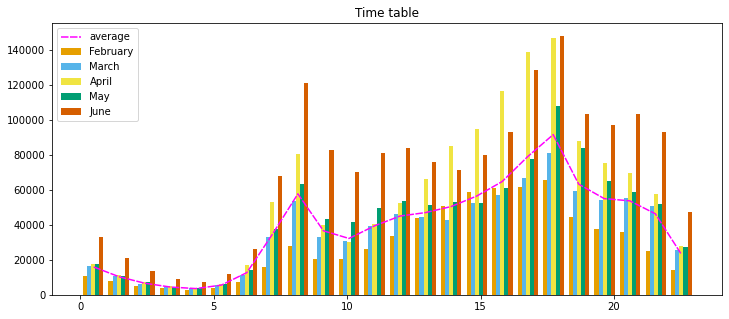

In [124]:
plt.figure(figsize = (12, 5))

# histogram
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
plt.hist([li_2, li_3, li_4, li_5, li_6], bins = 24, color = colors, 
         label=['February', 'March', 'April', 'May', 'June'])

# average
bins = np.linspace(0.5, 22.5, 24)
all_li = li_2 + li_3 + li_4 + li_5 + li_6
all_dict = {i:0 for i in range(0, 24)}
for i in all_li:
    all_dict[i] += 1/6
plt.plot(bins, all_dict.values(), linestyle=(0, (5, 1)), color = 'magenta', label='average')

plt.title('Time table')
plt.legend()

# in, out degree histogram

TypeError: 'Text' object is not callable

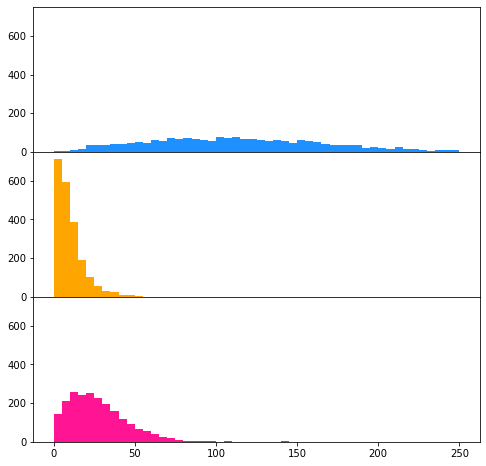

In [126]:
'''
in degree, out degree possible
9,10,11 줄의 in_degree를 out_degree로 바꾸면 out을 볼 수 있다.
'''
bins = np.linspace(0,250,51)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(8, 8))
ax1.hist([d for n, d in G_6_all.in_degree()], bins=bins, color = 'dodgerblue')
ax2.hist([d for n, d in G_6_on.in_degree()], bins=bins, color = 'orange')
ax3.hist([d for n, d in G_6_off.in_degree()], bins=bins, color = 'deeppink')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

# shortest path

In [6]:
''' 
calculate shortest path
숫자에 원하는 달을 넣으면 원하는 달의 값을 구함
계산 과정이 길어서 대표적으로 2월달을 넣었음
'''
short_2_on = nx.shortest_path(G_2_on)
short_2_off = nx.shortest_path(G_2_off)

In [15]:
# path length list
shortest_path_2_on = []
shortest_path_2_off = []
for i in short_2_on:
    for j in short_2_on[i]:
        try:
            shortest_path_2_on.append(len(short_2_on[i][j]))
        except:
            pass

for i in short_2_off:
    for j in short_2_off[i]:
        try:
            shortest_path_2_off.append(len(short_2_off[i][j]))
        except:
            pass

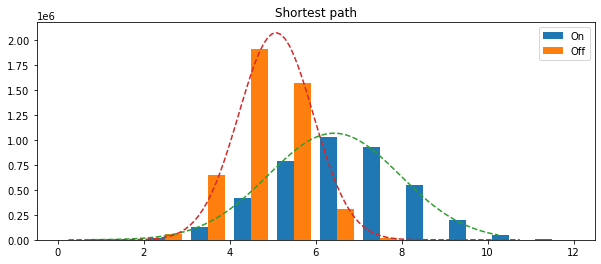

In [31]:
# gaussian fitting
mu_2_on = np.average(shortest_path_2_on)
sigma_2_on = np.std(shortest_path_2_on)
mu_2_off = np.average(shortest_path_2_off)
sigma_2_off = np.std(shortest_path_2_off)

con_bins = np.linspace(0, 10, 100)

y_1 = ((1 / (np.sqrt(2 * np.pi) * sigma_2_on)) * np.exp(-0.5 * 
       (1 / sigma_2_on * (con_bins - mu_2_on))**2))
y_2 = ((1 / (np.sqrt(2 * np.pi) * sigma_2_off)) * np.exp(-0.5 * 
       (1 / sigma_2_off * (con_bins - mu_2_off))**2))

# shortest path histogram
plt.figure(figsize = (10, 4))

plt.hist([shortest_path_2_on, shortest_path_2_off], 
          bins = [0,1,2,3,4,5,6,7,8,9,10,11,12], label=['On', 'Off'])

plt.plot(con_bins+0.25, y_1*4100000, '--')
plt.plot(con_bins+0.75, y_2*4500000, '--')

plt.title('Shortest path')
plt.legend()
plt.show()